## Generate affinity graph from segmentation

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from torch_connectomics.utils.seg.aff_util import affinitize, seg_to_affgraph
from torch_connectomics.utils.seg.seg_util import widen_border, mknhood3d

from matplotlib import pyplot as plt

In [2]:
def show_imgs(imgs, label=None, cmap=None):
    plt.figure(figsize=(16,4))
    for i in range(1,5):
        plt.subplot('14%d' % (i))
        if cmap is not None:
            plt.imshow(imgs[i-1], cmap=cmap)
        else:
            plt.imshow(imgs[i-1])
        if label is not None:
            plt.title(label+' '+str(i))
    plt.show()

### 1. Load data

For Harvard Research Computing (RC) cluster users, you can directly access the dsta directory if you have access to the `coxfs01` partition. For external users please check the tutotial for downloading the dataset and change the `data_path` accordingly.

In [3]:
data_path = '/n/coxfs01/zudilin/data/SNEMI3D/'
image_path = data_path + 'train_image.h5'
label_path = data_path + 'train_label.h5'
image = np.array(h5py.File(image_path, 'r')['main'])
label = np.array(h5py.File(label_path, 'r')['main'])
print(image.shape, image.ndim, image.dtype)
print(label.shape, label.ndim, label.dtype)

(100, 1024, 1024) 3 uint8
(100, 1024, 1024) 3 uint16


In [4]:
test_image = image[:4,:256,:256]
test_label = label[:4,:256,:256]

### 2. Generate affinity graph in z,y,x

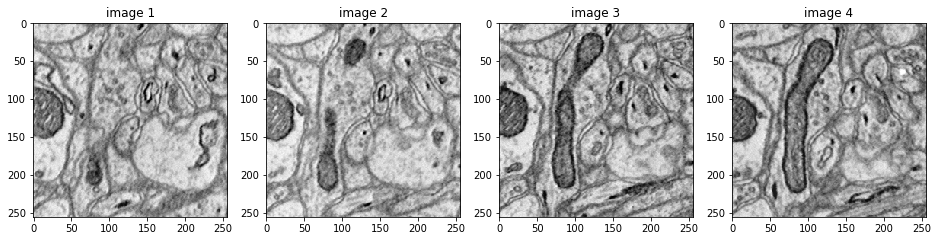

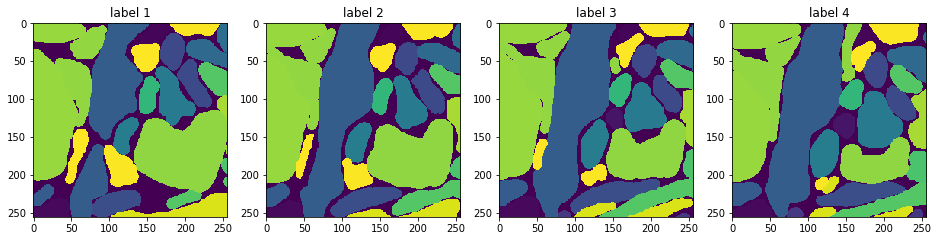

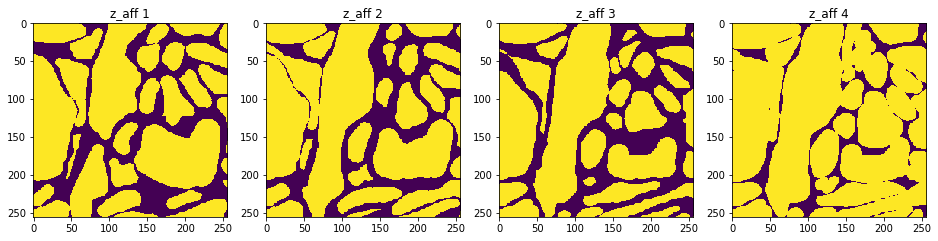

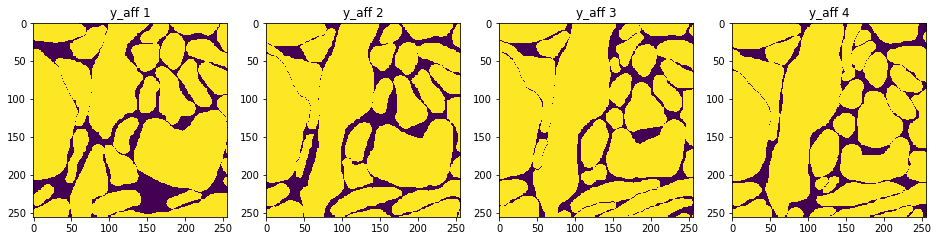

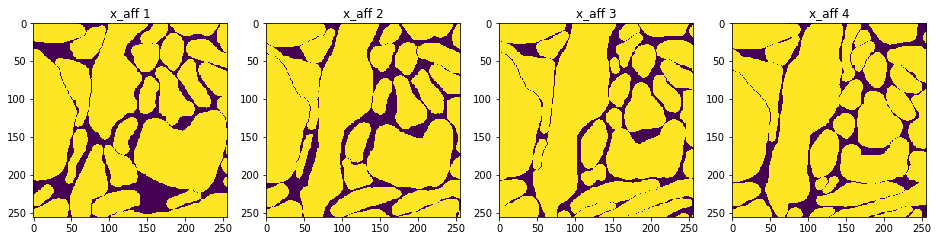

In [5]:
aff1 = affinitize(test_label)
show_imgs(test_image, 'image', cmap='gray')
show_imgs(test_label, 'label')
show_imgs(aff1[0], 'z_aff')
show_imgs(aff1[1], 'y_aff')
show_imgs(aff1[2], 'x_aff')

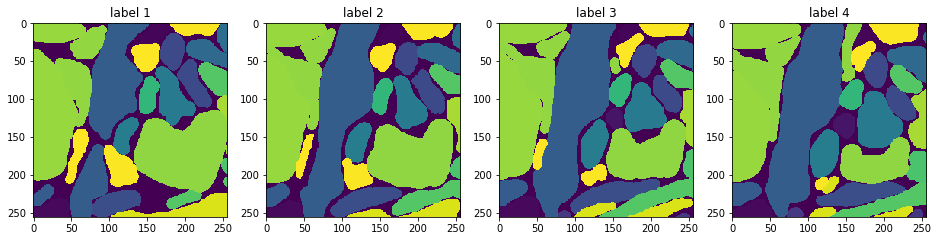

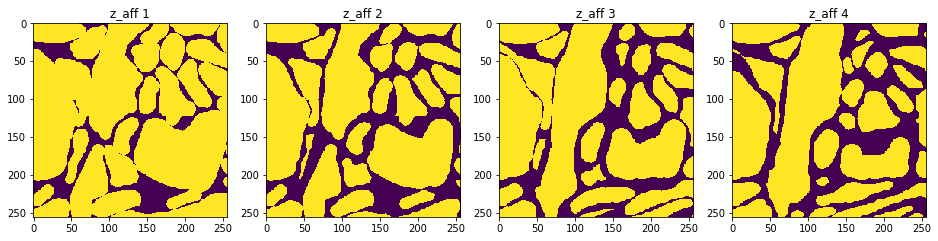

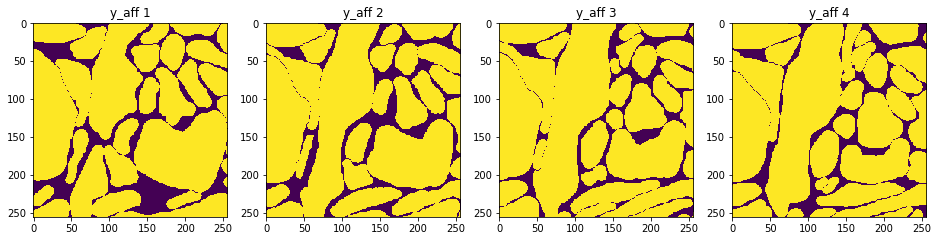

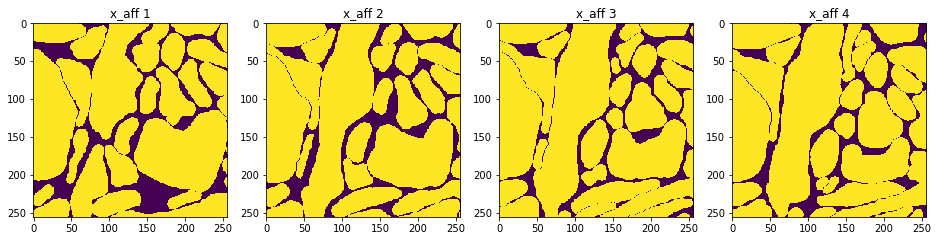

In [6]:
aff2 = seg_to_affgraph(test_label, mknhood3d(1), pad='replicate').astype(np.float32)
show_imgs(test_label, 'label')
show_imgs(aff2[0], 'z_aff')
show_imgs(aff2[1], 'y_aff')
show_imgs(aff2[2], 'x_aff')

### 3. Widen the mask border first to make the prediction more conservative

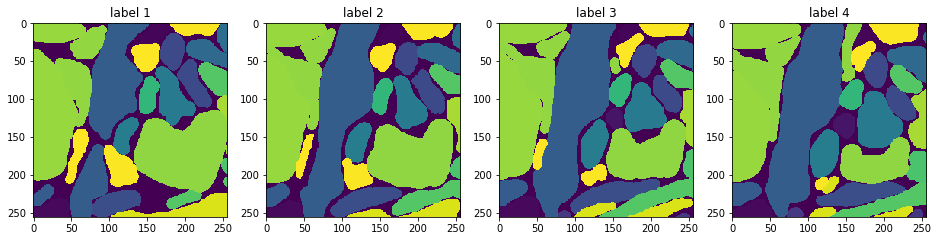

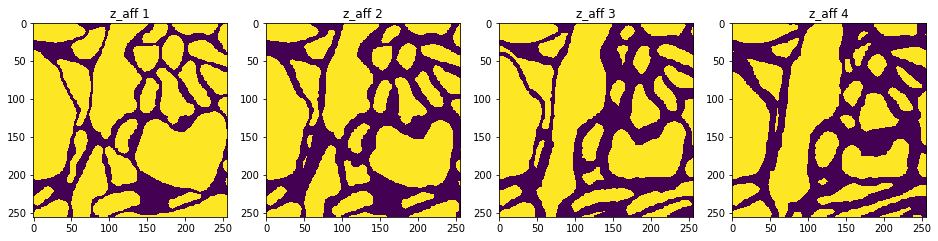

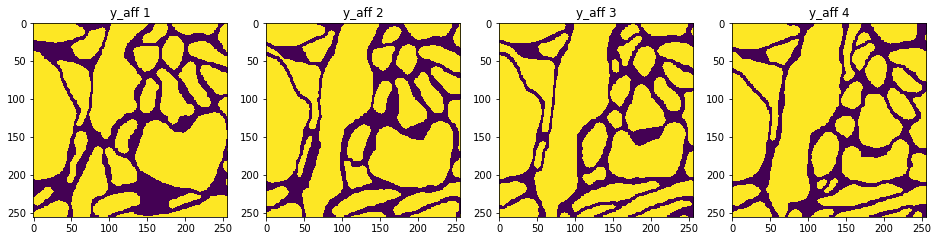

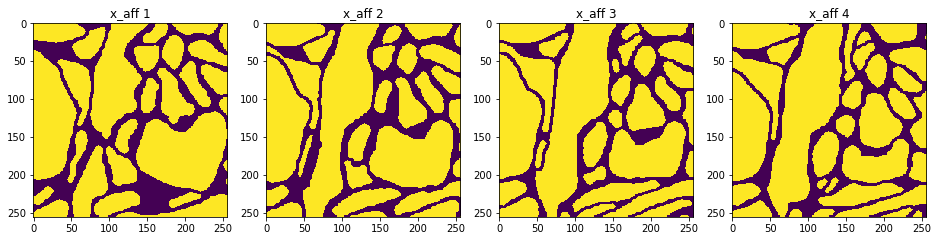

In [7]:
aff3 = seg_to_affgraph(widen_border(test_label,1), mknhood3d(1), pad='replicate').astype(np.float32)
show_imgs(test_label, 'label')
show_imgs(aff3[0], 'z_aff')
show_imgs(aff3[1], 'y_aff')
show_imgs(aff3[2], 'x_aff')